#EDA

Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

Data Collection

In [5]:

bcd=pd.read_csv(r'C:\Users\vansh\Desktop\DEP\Data.csv')

In [6]:
#Analysis
bcd["Mult"]=bcd["Hip t score"]*bcd["aBMD"]*bcd["HbA1c"]
bcd

,Name,HbA1c,Hip t score,aBMD,BV/TV,Modulus,Yield strength,Ultimate strength,Yield strain,yield energy,...,A1/1450,A2/1450,AII Position,AI Position,TRABECULAR THICKNESS,TRABECULAR NUMBER PER MM,TRABECULAR SPACING,SMI,Anisotropy,Mult
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020,NaN,...,NaN,NaN,NaN,NaN,0.22,1.64,0.39,0.62,0.63,NaN
1,2,5.8,-2.3,0.573,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.64382
2,3,5.4,-0.7,0.780,22.5,275.0,4.5,5.6,0.014,0.032,...,5.5,1.3,1545.0,1639.5,0.15,1.50,0.52,NaN,NaN,-2.94840
3,4,5.7,-2.6,0.722,20.2,156.1,2.5,3.8,NaN,NaN,...,5.6,3.7,1541.1,1635.6,0.18,1.10,0.73,2.50,0.52,-10.70004
4,5,4.8,-3.6,0.615,13.9,246.0,4.0,4.5,0.018,0.037,...,9.8,5.5,1541.1,1652.9,0.13,1.05,0.82,NaN,NaN,-10.62720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,7.2,-1.4,0.536,NaN,NaN,NaN,NaN,NaN,NaN,...,6.4,3.1,1539.2,1645.3,NaN,NaN,NaN,NaN,NaN,-5.40288
95,96,9.7,-3.3,0.514,21.3,202.0,4.6,8.8,0.018,0.042,...,1.2,0.6,1543.1,1645.3,0.15,1.40,0.56,NaN,NaN,-16.45314
96,97,7.3,NaN,0.689,27.2,226.0,7.3,9.6,NaN,NaN,...,NaN,NaN,NaN,NaN,0.21,1.40,0.50,1.13,0.61,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = pd.DataFrame()
df["aBMD"] = bcd["aBMD"]
df["group"] = bcd["group.1"]
df["HbA1c"]=bcd["HbA1c"]
df["Tscore"]=bcd["Hip t score"]
# df["Ult_strength"] = bcd[" Ultimate strength"]
# df["Toughness"] = bcd["Toughness"]
df["bv"]=bcd["BV/TV"]


In [8]:
df

,aBMD,group,HbA1c,Tscore,bv
0,NaN,NaN,NaN,NaN,NaN
1,0.573,c,5.8,-2.3,NaN
2,0.780,c,5.4,-0.7,22.5
3,0.722,c,5.7,-2.6,20.2
4,0.615,c,4.8,-3.6,13.9
...,...,...,...,...,...
94,0.536,t,7.2,-1.4,NaN
95,0.514,t,9.7,-3.3,21.3
96,0.689,NaN,7.3,NaN,27.2
97,NaN,NaN,NaN,NaN,NaN


In [9]:
enc = LabelEncoder()
enc.fit(df["group"])
df["group"] = enc.transform(df["group"])


In [10]:
from sklearn.impute import KNNImputer
# enc = LabelEncoder()
# enc.fit(df["group"])
# df["group"] = enc.transform(df["group"])


df1 = pd.DataFrame()
df1["aBMD"] = bcd["aBMD"]
#df1["group"] = bcd["group.1"]
df1["HbA1c"]=bcd["HbA1c"]
df1["Tscore"]=bcd["Hip t score"]
# df["Ult_strength"] = bcd[" Ultimate strength"]
# df["Toughness"] = bcd["Toughness"]
# df1["group"]=df["group"]
df1["bv"]=bcd["BV/TV"]

imputer = KNNImputer()
imputer.fit(df1)
trans = imputer.transform(df1)
print(trans)
df = pd.DataFrame(trans, columns = ['aBMD','HbA1c','Tscore','bv'])

[[ 0.60533333  6.29076923 -2.57848101 20.68823529]
 [ 0.573       5.8        -2.3        17.22      ]
 [ 0.78        5.4        -0.7        22.5       ]
 [ 0.722       5.7        -2.6        20.2       ]
 [ 0.615       4.8        -3.6        13.9       ]
 [ 0.634       5.8        -2.2        20.1       ]
 [ 0.615       5.8        -2.4        22.7       ]
 [ 0.60533333  6.29076923 -2.57848101 20.68823529]
 [ 0.668       5.6        -3.1        21.5       ]
 [ 0.465       5.1        -2.9        23.22      ]
 [ 0.679       5.1        -2.5        28.22      ]
 [ 0.642       5.4        -0.7        26.78      ]
 [ 0.681       5.8        -2.4        18.58      ]
 [ 0.6682      5.4        -2.2        33.4       ]
 [ 0.555       6.2        -2.         23.8       ]
 [ 0.533       5.1        -2.64       25.4       ]
 [ 0.503       6.3        -2.64       10.        ]
 [ 0.731       5.5        -5.5        28.5       ]
 [ 0.573       5.4        -1.7        25.16      ]
 [ 0.659       5.4        -2.1 

In [11]:

df["group"]=bcd["group.1"]
j=int(0)
for i in df["HbA1c"]:
    if(i>=6.5):
        df["group"][j]=1
    else:
        df["group"][j]=0
    j+=1


C:\Users\vansh\AppData\Local\Temp\ipykernel_20540\972348730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group"][j]=0
C:\Users\vansh\AppData\Local\Temp\ipykernel_20540\972348730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group"][j]=1


In [12]:
print(df)

        aBMD     HbA1c    Tscore         bv group
0   0.605333  6.290769 -2.578481  20.688235     0
1   0.573000  5.800000 -2.300000  17.220000     0
2   0.780000  5.400000 -0.700000  22.500000     0
3   0.722000  5.700000 -2.600000  20.200000     0
4   0.615000  4.800000 -3.600000  13.900000     0
..       ...       ...       ...        ...   ...
94  0.536000  7.200000 -1.400000  21.720000     1
95  0.514000  9.700000 -3.300000  21.300000     1
96  0.689000  7.300000 -2.200000  27.200000     1
97  0.605333  6.290769 -2.578481  20.688235     0
98  0.605333  6.290769 -2.578481  20.688235     0

[99 rows x 5 columns]


In [13]:
# mean_aBMD = df["aBMD"].mean()
# mean_hb = df["HbA1c"].mean()
# mean_ts = df["Tscore"].mean()


In [14]:
# mean_US = df["Ult_strength"].mean()
# mean_th = df["Toughness"].mean()

In [15]:
# df["aBMD"].fillna(value=mean_aBMD, inplace=True)
# df["HbA1c"].fillna(value=mean_hb, inplace=True)
# df["Tscore"].fillna(value=mean_ts, inplace=True)

In [16]:
# df["Ult_strength"].fillna(value=mean_US, inplace=True)
# df["Toughness"].fillna(value=mean_th, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aBMD    99 non-null     float64
 1   HbA1c   99 non-null     float64
 2   Tscore  99 non-null     float64
 3   bv      99 non-null     float64
 4   group   99 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [18]:
# X = df.drop(columns=["Ult_strength", "Toughness"])
# y1 = df["Ult_strength"]
# y2 = df["Toughness"]

In [19]:
# us_max = y1.max()
# t_max = y2.max()
# y1 = y1/us_max
# y2=y2/t_max


Shape

In [20]:
# X

Information

Splitting train and test data

In [21]:
# x_train,x_test,y1_train,y1_test = train_test_split(X,y1,test_size=0.2,random_state=2)
# x_train,x_test,y2_train,y2_test = train_test_split(X,y2,test_size=0.2,random_state=2)


Standardize data


In [22]:
# scaler=StandardScaler()
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.fit_transform(x_test)

#Building neural network

In [23]:
#Setting up layer
# model=keras.Sequential([
#                         keras.layers.Dense(8,input_shape=(2,)),
#                         keras.layers.Dense(6,),
#                         keras.layers.Dense(5,),
#                         keras.layers.Dense(1, activation = 'relu')
# ])
# model1 = keras.Sequential([
#     layers.Dense(64,input_shape=(4,), activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1)
# ])
# model2=keras.Sequential([
#     layers.Dense(64,input_shape=(4,), activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1)
# ])

In [24]:
#Compiling
# model1.compile(optimizer='adam',
#               loss='mean_squared_error',
#               )
# model2.compile(optimizer='adam',
#               loss='mean_absolute_error',
#               )

In [25]:
#Training model

# history1=model1.fit(x_train,y1_train, validation_split=0.1, epochs=50)


In [26]:

# history2=model2.fit(x_train,y2_train, validation_split=0.1, epochs=50)

Visualizing accuracy and loss

In [27]:
# plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])

# plt.title('Model Evaluation')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')

# plt.legend(['Training data','Validation data'],loc='upper right')

In [28]:
# plt.plot(history2.history['loss'])
# plt.plot(history2.history['val_loss'])

# plt.title('Model Evaluation')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')

# plt.legend(['Training data','Validation data'],loc='upper right')

Accuracy on test data

In [29]:
# results1 =model1.evaluate(x_test,y1_test)
# print(results1)
# print(loss)
# print(accuracy)  

In [30]:
# results2 =model2.evaluate(x_test,y2_test)
# print(results2)


In [31]:
# y_pred=model1.predict(x_test)
# print(y_pred)

In [32]:
# yy=np.array(y1_test)
# print(yy)

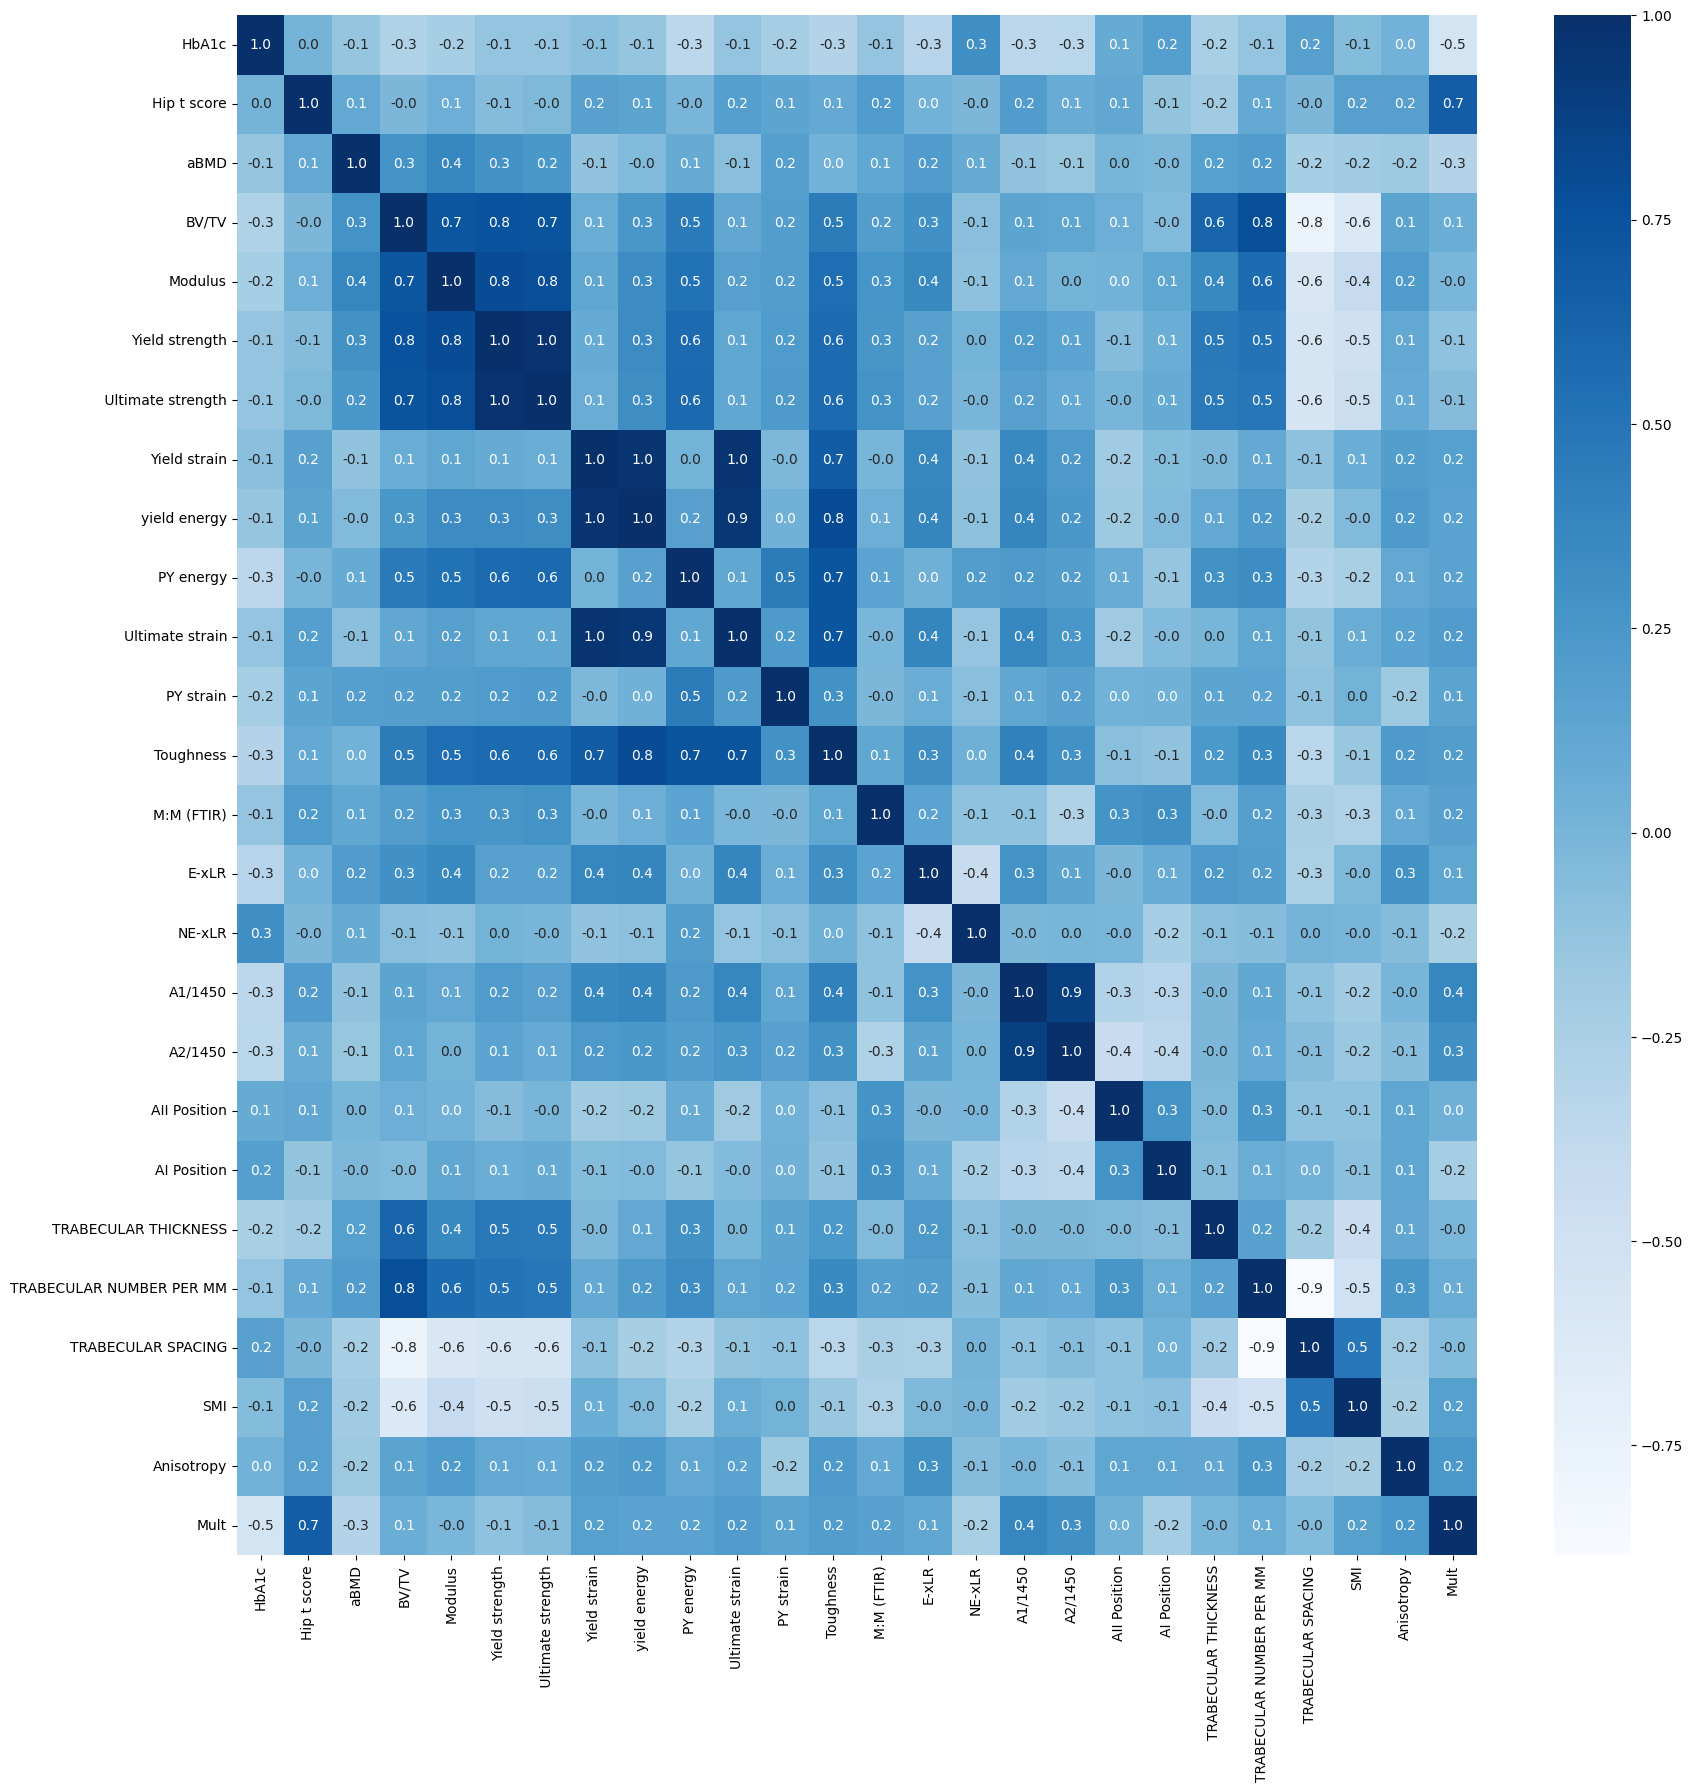

In [33]:
bcd.drop(columns='Unnamed: 12',inplace=True)
cm=bcd.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm,cbar=True,fmt='.1f',annot=True, cmap="Blues")
plt.savefig('Correlation Matrix')

Linear Regression

In [34]:
train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

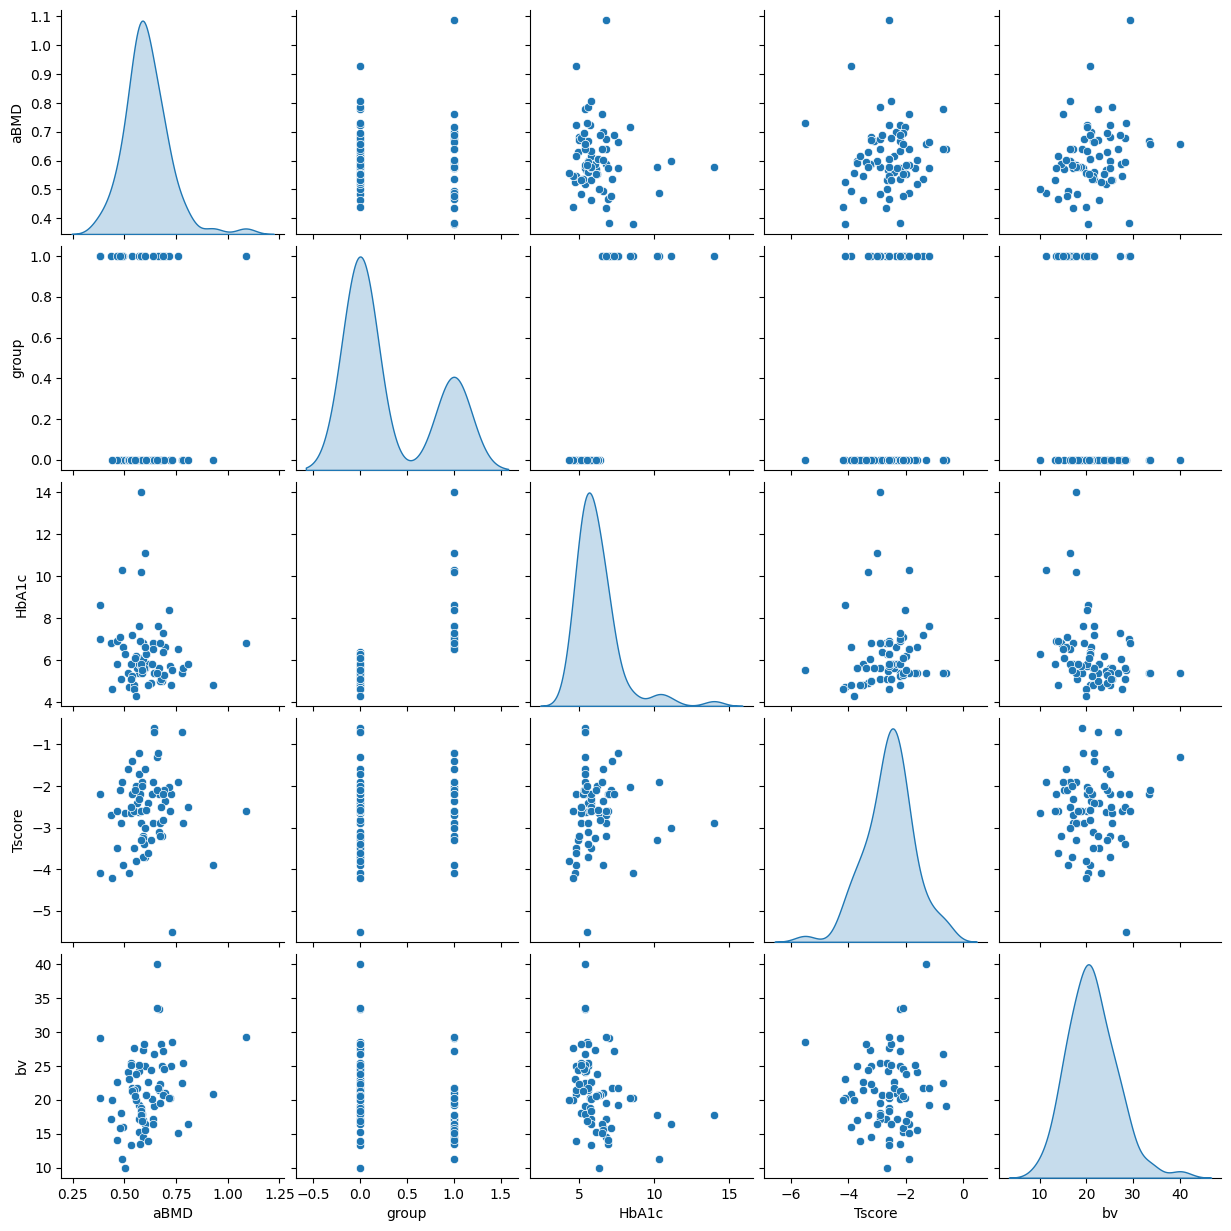

In [35]:
sns.pairplot(train[['aBMD', 'group', 'HbA1c', 'Tscore','bv']], diag_kind='kde')

In [36]:
train_features = train.copy()
test_features = test.copy()
# print(train_features)

train_labels = train_features.pop('bv')
test_labels = test_features.pop('bv')

In [37]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [38]:
normalizer.adapt(np.array(train_features,dtype='float32'))

In [39]:
print(normalizer.mean.numpy())

[[ 0.6082565   6.196125   -2.581676    0.30379748]]


In [40]:
first = np.array(train_features[:1],dtype='float32')

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 0.49  5.1  -2.9   0.  ]]

Normalized: [[-1.14 -0.73 -0.38 -0.66]]


In [56]:
model=keras.Sequential([
                        normalizer,
                        # keras.layers.Dense(32),
                        keras.layers.Dense(16),
                        keras.layers.Dense(8),
                        keras.layers.Dense(1, activation = 'relu')
])

In [57]:


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')



Epoch 1/100
3/3 [==============================] - 1s 94ms/step - loss: 427.1571 - val_loss: 291.2427
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 153.6013 - val_loss: 287.4615
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 142.1928 - val_loss: 287.4181
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 150.8947 - val_loss: 243.1175
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: 127.3672 - val_loss: 223.9809
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 122.7100 - val_loss: 264.2057
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 116.0679 - val_loss: 265.3834
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 137.5820 - val_loss: 263.1515
Epoch 9/100
3/3 [==============================] - 0s 30ms/step - loss: 126.1266 - val_loss: 279.7032
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 125.1333 

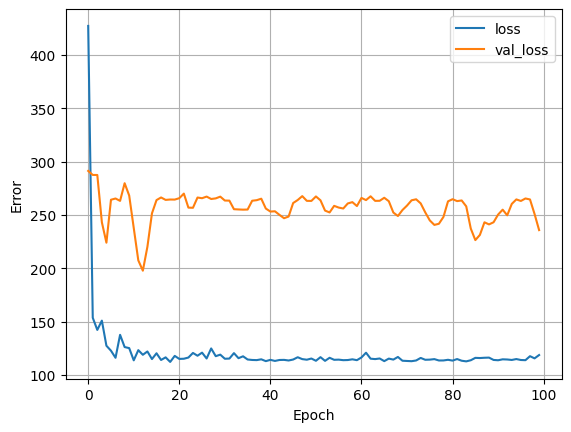

In [58]:
%%time
history = model.fit(
    np.array(train_features,dtype='float32'),
    np.array(train_labels,dtype='float32'),
   
    # train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.1)

plot_loss(history)

In [59]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [60]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [61]:
%%time
history = linear_model.fit(
    np.array(train_features,dtype='float32'),
    np.array(train_labels,dtype='float32'),
   
    # train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.1)

Epoch 1/100
3/3 [==============================] - 1s 76ms/step - loss: 472.3456 - val_loss: 517.6215
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 458.1262 - val_loss: 504.2842
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 445.0691 - val_loss: 492.4848
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 432.4895 - val_loss: 484.1915
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 419.8754 - val_loss: 474.7180
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 407.0881 - val_loss: 462.6344
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 396.0407 - val_loss: 451.0170
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 383.6140 - val_loss: 440.0583
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 372.1531 - val_loss: 428.5334
Epoch 10/100
3/3 [==============================] - 0s 26ms/step - loss: 361.2676 

In [62]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [63]:
print(history.history['val_loss'])

[517.6214599609375, 504.28424072265625, 492.4848327636719, 484.1914978027344, 474.718017578125, 462.6344299316406, 451.01702880859375, 440.0583190917969, 428.5334167480469, 417.79510498046875, 407.7272644042969, 399.8481140136719, 391.974609375, 384.84832763671875, 376.88470458984375, 367.6983642578125, 358.7877197265625, 349.5382080078125, 341.42529296875, 333.37835693359375, 322.7613525390625, 313.0825500488281, 305.2177734375, 298.6877746582031, 292.80010986328125, 286.2073974609375, 278.89398193359375, 272.2575988769531, 265.74267578125, 259.22650146484375, 252.64730834960938, 246.97091674804688, 239.35853576660156, 230.12359619140625, 219.8858642578125, 210.6961669921875, 201.8046875, 193.0767822265625, 185.58206176757812, 179.33175659179688, 174.1742706298828, 169.4105224609375, 165.36019897460938, 162.20973205566406, 159.71896362304688, 155.5233154296875, 150.5472412109375, 145.7532501220703, 141.321044921875, 136.53636169433594, 132.90428161621094, 128.8970184326172, 125.597900

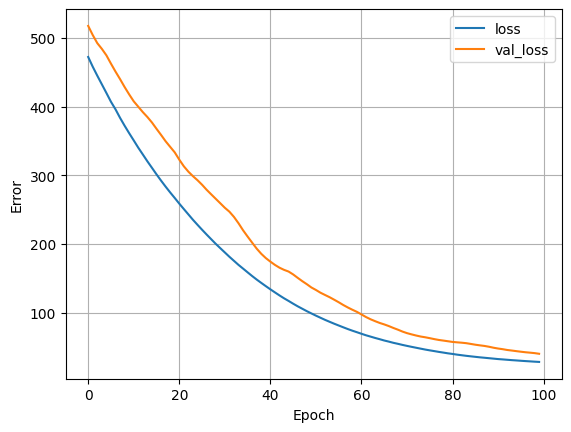

In [64]:
plot_loss(history)

In [65]:
results1 =model.evaluate(np.array(test_features,dtype='float32'),
    np.array(test_labels,dtype='float32'),)
print(results1)


1/1 [==============================] - 0s 26ms/step - loss: 181.3819
181.3819122314453


In [66]:
def plot_graph(x, y,a,b):
  plt.scatter(x, y,)
  plt.plot(a, b, color='k', label='Predictions')
  plt.xlabel('Data')
  plt.ylabel('Prediction')
  plt.legend()

In [69]:
y_pred=model.predict(np.array(train_features,dtype='float32'))
print(y_pred)
print(test_labels)

3/3 [==============================] - 0s 3ms/step
[[20.78871   ]
 [ 0.        ]
 [29.022877  ]
 [21.83527   ]
 [ 0.        ]
 [ 0.        ]
 [19.418165  ]
 [ 0.        ]
 [20.367079  ]
 [ 0.        ]
 [23.120298  ]
 [ 0.        ]
 [ 0.        ]
 [24.520699  ]
 [21.232826  ]
 [23.670351  ]
 [24.870943  ]
 [26.921846  ]
 [26.505936  ]
 [22.568768  ]
 [20.033175  ]
 [18.154493  ]
 [24.168385  ]
 [ 0.        ]
 [20.235012  ]
 [26.879354  ]
 [22.578865  ]
 [21.232826  ]
 [ 0.        ]
 [ 0.        ]
 [21.997372  ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [22.033783  ]
 [25.946249  ]
 [23.834637  ]
 [22.809717  ]
 [22.058626  ]
 [ 0.        ]
 [22.062624  ]
 [23.662018  ]
 [21.281631  ]
 [20.854479  ]
 [22.227087  ]
 [22.04157   ]
 [19.535637  ]
 [20.207531  ]
 [25.587847  ]
 [23.246735  ]
 [ 0.        ]
 [23.230265  ]
 [21.232826  ]
 [23.505268  ]
 [20.83236   ]
 [22.605562  ]
 [26.744747  ]
 [21.807713  ]
 [18.613714  ]
 [21.782328  ]
 [24.699715  ]
 [25.30106   ]
 [ 0.        ]
 [21

[ 1. 30.] [ 1. 30.]


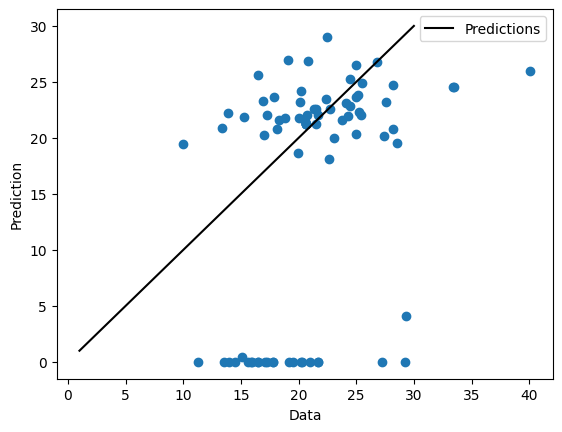

In [70]:
a=np.array([])
a=np.append(a,[1,30])
b=a
print(a,b)
plot_graph(train_labels,y_pred,a,b)

In [54]:
test_results={}


In [55]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
test_results

{'linear_model': 65.22765350341797}

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 2 to 95
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aBMD    54 non-null     float64
 1   group   54 non-null     int32  
 2   HbA1c   54 non-null     float64
 3   Tscore  54 non-null     float64
 4   bv      54 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 4.4 KB


In [ ]:
x_values=train_features
y_values=train_labels


Polynomial Regression

In [ ]:
degree=7
poly_model = PolynomialFeatures(degree=degree)
poly_x_values = poly_model.fit_transform(x_values)
print(f'initial values {x_values.iloc[0]}\nMapped to {poly_x_values[0]}')



initial values aBMD      0.514
group     1.000
HbA1c     9.700
Tscore   -3.300
Name: 95, dtype: float64
Mapped to [ 1.00000000e+00  5.14000000e-01  1.00000000e+00  9.70000000e+00
 -3.30000000e+00  2.64196000e-01  5.14000000e-01  4.98580000e+00
 -1.69620000e+00  1.00000000e+00  9.70000000e+00 -3.30000000e+00
  9.40900000e+01 -3.20100000e+01  1.08900000e+01  1.35796744e-01
  2.64196000e-01  2.56270120e+00 -8.71846800e-01  5.14000000e-01
  4.98580000e+00 -1.69620000e+00  4.83622600e+01 -1.64531400e+01
  5.59746000e+00  1.00000000e+00  9.70000000e+00 -3.30000000e+00
  9.40900000e+01 -3.20100000e+01  1.08900000e+01  9.12673000e+02
 -3.10497000e+02  1.05633000e+02 -3.59370000e+01  6.97995264e-02
  1.35796744e-01  1.31722842e+00 -4.48129255e-01  2.64196000e-01
  2.56270120e+00 -8.71846800e-01  2.48582016e+01 -8.45691396e+00
  2.87709444e+00  5.14000000e-01  4.98580000e+00 -1.69620000e+00
  4.83622600e+01 -1.64531400e+01  5.59746000e+00  4.69113922e+02
 -1.59595458e+02  5.42953620e+01 -1.84716

In [ ]:
poly_model.fit(poly_x_values, y_values)
regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_values, y_pred, squared=False)


5.783923067470228e-10

[  1254     10      9     31   -144     41   -235  -4294   1532    461
 102402]
2     22.5
5     20.1
21    13.4
35    18.8
38    16.5
44    18.1
67    14.4
72    29.3
82    19.2
86    16.0
89    17.8
Name: bv, dtype: float64


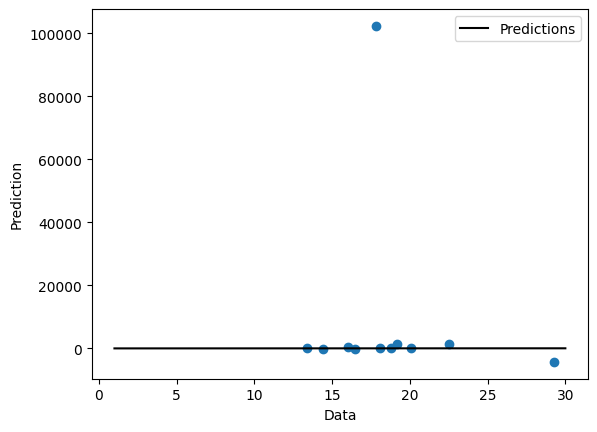

In [ ]:

pt=poly_model.fit_transform(test_features)
y_pred=regression_model.predict(pt)
y_pred=y_pred.astype(int)
print(y_pred)
print(test_labels)
plot_graph(test_labels,y_pred,a,b)

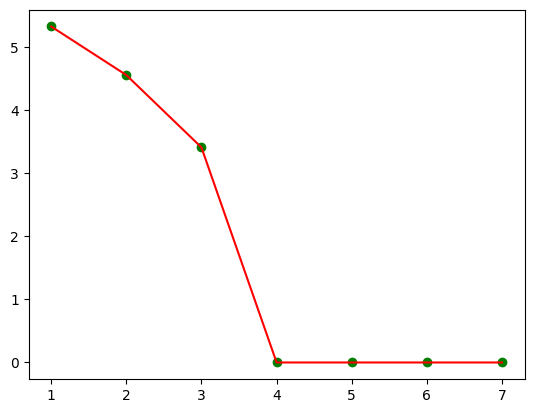

In [ ]:
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 
 

In [ ]:
plot_graph()

TypeError: plot_graph() missing 4 required positional arguments: 'x', 'y', 'a', and 'b'